In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

## Read bike counts dataset

In [2]:
bike_ds = pd.read_csv('/home/jovyan/CEE 498/Project 1/bikecounts_reg.csv', sep=",",header=0)

# Delete the first columm named "Unnaamed: 0"
del bike_ds['Unnamed: 0']

## Show the dataframe

In [3]:
bike_ds.head()

,ID,volume,peak_hour,road_primary,road_secondary,road_tertiary,floor,landuse_residential,landuse_parks,metro_station,bus_station,LUM,number_of_schools,number_of_colleges,number_of_intersection,pop_percent_female,pop_under_age15,pop_above_age65,time,date
0,0,239,1,2.487360,3.00518,1.64307,21,0.292108,0.016096,5,11.9226,0.328019,15,0.0,0.485,0.514648,0.080044,0.139291,8,1
1,0,60,0,2.487360,3.00518,1.64307,21,0.292108,0.016096,5,11.9226,0.328019,15,0.0,0.485,0.514648,0.080044,0.139291,14,1
2,0,23,0,2.487360,3.00518,1.64307,21,0.292108,0.016096,5,11.9226,0.328019,15,0.0,0.485,0.514648,0.080044,0.139291,11,8
3,0,267,1,2.487360,3.00518,1.64307,21,0.292108,0.016096,5,11.9226,0.328019,15,0.0,0.485,0.514648,0.080044,0.139291,18,8
4,1,124,1,0.738002,3.23526,2.71876,17,0.415129,0.012700,1,17.2960,0.262185,6,0.0,0.118,0.491440,0.066955,0.130528,8,1


In [4]:
bike_ds.describe()

,ID,volume,peak_hour,road_primary,road_secondary,road_tertiary,floor,landuse_residential,landuse_parks,metro_station,bus_station,LUM,number_of_schools,number_of_colleges,number_of_intersection,pop_percent_female,pop_under_age15,pop_above_age65,time,date
count,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000
mean,56.500000,76.182018,0.500000,1.583903,1.606639,1.544230,15.657895,0.337011,0.047070,2.517544,10.072235,0.178788,9.736842,0.116726,0.411325,0.496116,0.075331,0.126099,12.750000,4.500000
std,32.943842,85.981775,0.500549,1.115525,1.332838,1.051273,4.745532,0.134911,0.035312,2.223679,5.219795,0.101741,7.182460,0.206122,0.437893,0.021301,0.015150,0.043101,3.703725,3.503844
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.071813,0.001805,0.000000,2.648410,0.015651,1.000000,0.000000,0.023000,0.420802,0.048703,0.039626,8.000000,1.000000
25%,28.000000,15.000000,0.000000,0.795799,0.749354,0.810155,12.000000,0.226326,0.020649,1.000000,6.447120,0.102108,4.000000,0.000000,0.126000,0.486644,0.064434,0.101274,10.250000,1.000000
50%,56.500000,41.000000,0.500000,1.283940,1.141660,1.333140,15.000000,0.346643,0.038549,2.000000,9.395760,0.160129,9.000000,0.000000,0.245500,0.499992,0.073159,0.128365,12.500000,4.500000
75%,85.000000,110.000000,1.000000,2.369350,2.343450,2.128920,19.000000,0.430002,0.062241,4.000000,12.178400,0.259176,14.000000,0.163695,0.588000,0.510454,0.083601,0.149304,15.000000,8.000000
max,113.000000,406.000000,1.000000,6.168220,7.435370,6.292050,32.000000,0.646501,0.178045,12.000000,35.952300,0.461831,35.000000,0.854380,2.727000,0.542993,0.117288,0.352935,18.000000,8.000000


In [5]:
#residential.head()
bike_resCorr=bike_ds.corr(method ='pearson') 
type(bike_resCorr)

# Create correlation csv.
bike_resCorr.to_csv('bike_corrFile.csv')

In [6]:
bike_resCorr.describe()

,ID,volume,peak_hour,road_primary,road_secondary,road_tertiary,floor,landuse_residential,landuse_parks,metro_station,bus_station,LUM,number_of_schools,number_of_colleges,number_of_intersection,pop_percent_female,pop_under_age15,pop_above_age65,time,date
count,20.000000,20.000000,20.000000,20.000000,2.000000e+01,2.000000e+01,20.000000,20.000000,2.000000e+01,20.000000,2.000000e+01,20.000000,2.000000e+01,20.000000,20.000000,20.000000,20.000000,20.000000,2.000000e+01,20.000000
mean,0.088973,0.232118,0.079822,0.162133,1.388831e-01,2.226115e-01,0.288510,0.189668,1.577037e-01,0.111322,2.655409e-01,0.281933,2.767136e-01,0.152599,-0.108850,0.284596,-0.177000,0.261501,8.915051e-02,0.080492
std,0.224705,0.288735,0.246751,0.269083,2.481241e-01,3.097753e-01,0.313498,0.339457,2.593122e-01,0.229533,3.379074e-01,0.370197,3.566813e-01,0.237918,0.368158,0.403331,0.383874,0.400163,2.436695e-01,0.242019
min,-0.100298,-0.416476,0.000000,-0.302625,-2.495511e-01,-3.401347e-01,-0.314633,-0.518569,-2.803060e-01,-0.111503,-4.648756e-01,-0.603252,-4.092255e-01,-0.172241,-0.580205,-0.580205,-0.701217,-0.701217,-8.177059e-18,0.000000
25%,-0.001016,0.140391,0.000000,-0.003183,-1.087440e-18,7.520136e-19,0.101451,-0.001753,1.923972e-18,0.000000,1.211652e-18,0.023788,3.170009e-17,0.000000,-0.305730,0.024400,-0.411038,0.101082,-3.866046e-19,0.000000
50%,0.036256,0.255367,0.000000,0.138643,9.418716e-02,2.427112e-01,0.280441,0.165882,1.246256e-01,0.047664,3.122433e-01,0.304017,2.755292e-01,0.124954,-0.149356,0.324885,-0.264929,0.312437,1.309110e-18,0.000000
75%,0.110398,0.337030,0.000000,0.282538,2.001226e-01,4.191228e-01,0.505460,0.363195,2.590087e-01,0.121525,4.977487e-01,0.580805,5.393329e-01,0.226813,0.012682,0.591455,0.000000,0.492949,2.122864e-17,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000


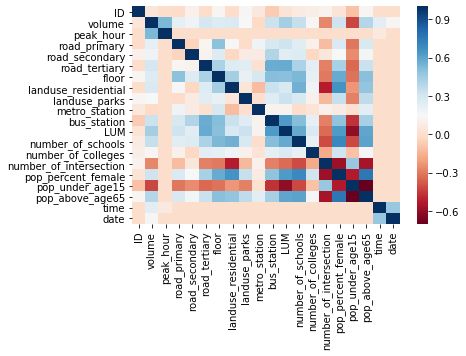

In [7]:
# plot the correlation heatmap
import seaborn as sns

sns.heatmap(bike_resCorr, xticklabels=bike_resCorr.columns, yticklabels=bike_resCorr.columns, cmap='RdBu')

# Multiple Linear Regression

In [8]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [9]:
X = bike_ds[['ID','peak_hour','road_primary','road_tertiary','floor','landuse_parks','landuse_residential','metro_station','bus_station',
  'LUM','number_of_schools','number_of_colleges','number_of_intersection','pop_percent_female','pop_under_age15','pop_above_age65','time','date']]

y = bike_ds[['volume']].values

results = sm.OLS(y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.769
Model:                            OLS   Adj. R-squared (uncentered):              0.760
Method:                 Least Squares   F-statistic:                              81.07
Date:                Tue, 05 May 2020   Prob (F-statistic):                   7.22e-127
Time:                        17:41:51   Log-Likelihood:                         -2475.7
No. Observations:                 456   AIC:                                      4987.
Df Residuals:                     438   BIC:                                      5062.
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
ID                         0.0482      0.087      0.556      0.579      -0.122       0.219
peak_hour                 89.0360      5.286     16.842      0.000      78.646      99.426
road_primary               6.7050      2.914      2.301      0.022       0.978      12.432
road_tertiary              4.2443      3.372      1.259      0.209      -2.383      10.872
floor                     -0.8575      0.867     -0.989      0.323      -2.561       0.846
landuse_parks            -18.1312     86.493     -0.210      0.834    -188.124     151.861
landuse_residential       85.1744     29.000      2.937      0.003      28.177     142.172
metro_station             -2.3341      1.486     -1.570      0.117      -5.255       0.587
bus_station                0.4252      0.751      0.566      0.572      -1.051       1.902
LUM                      189.0454     44.294      4.268      0.000     101.990     276.101
number_of_schools          0.2763      0.558      0.495      0.621      -0.821       1.374
number_of_colleges         7.5150     13.671      0.550      0.583     -19.355      34.385
number_of_intersection     3.4950      8.381      0.417      0.677     -12.977      19.967
pop_percent_female      -157.5197     74.371     -2.118      0.035    -303.687     -11.352
pop_under_age15         -732.5934    295.933     -2.476      0.014   -1314.219    -150.968
pop_above_age65          243.9547    133.463      1.828      0.068     -18.353     506.262
time                       4.4787      0.809      5.535      0.000       2.888       6.069
date                       1.1972      0.855      1.400      0.162      -0.484       2.878
==============================================================================
Omnibus:                       24.940   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.987
Skew:                           0.548   Prob(JB):                     8.37e-07
Kurtosis:                       3.523   Cond. No.                     8.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* Remove variables where absolute t value is greater than 2.

In [10]:
X = bike_ds[['ID','road_tertiary','floor','landuse_parks','metro_station','bus_station',
  'number_of_schools','number_of_colleges','number_of_intersection','pop_above_age65','date']]

y = bike_ds[['volume']].values

results = sm.OLS(y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.565
Model:                            OLS   Adj. R-squared (uncentered):              0.555
Method:                 Least Squares   F-statistic:                              52.64
Date:                Tue, 05 May 2020   Prob (F-statistic):                    1.67e-73
Time:                        17:41:51   Log-Likelihood:                         -2619.9
No. Observations:                 456   AIC:                                      5262.
Df Residuals:                     445   BIC:                                      5307.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
ID                         0.0063      0.116      0.054      0.957      -0.222       0.235
road_tertiary              7.2037      4.343      1.659      0.098      -1.331      15.739
floor                     -0.8905      0.937     -0.950      0.343      -2.732       0.951
landuse_parks            -72.7957    112.512     -0.647      0.518    -293.917     148.326
metro_station             -3.1377      1.819     -1.725      0.085      -6.712       0.437
bus_station                1.9698      0.950      2.074      0.039       0.103       3.836
number_of_schools          1.1937      0.696      1.715      0.087      -0.174       2.562
number_of_colleges        12.9915     18.369      0.707      0.480     -23.110      49.093
number_of_intersection   -14.9497      8.874     -1.685      0.093     -32.390       2.491
pop_above_age65          414.2675    111.727      3.708      0.000     194.689     633.846
date                       2.7751      0.995      2.789      0.006       0.820       4.731
==============================================================================
Omnibus:                       84.357   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.394
Skew:                           1.182   Prob(JB):                     4.85e-29
Kurtosis:                       4.129   Cond. No.                     2.42e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Let's take a look at the relationship between features.

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

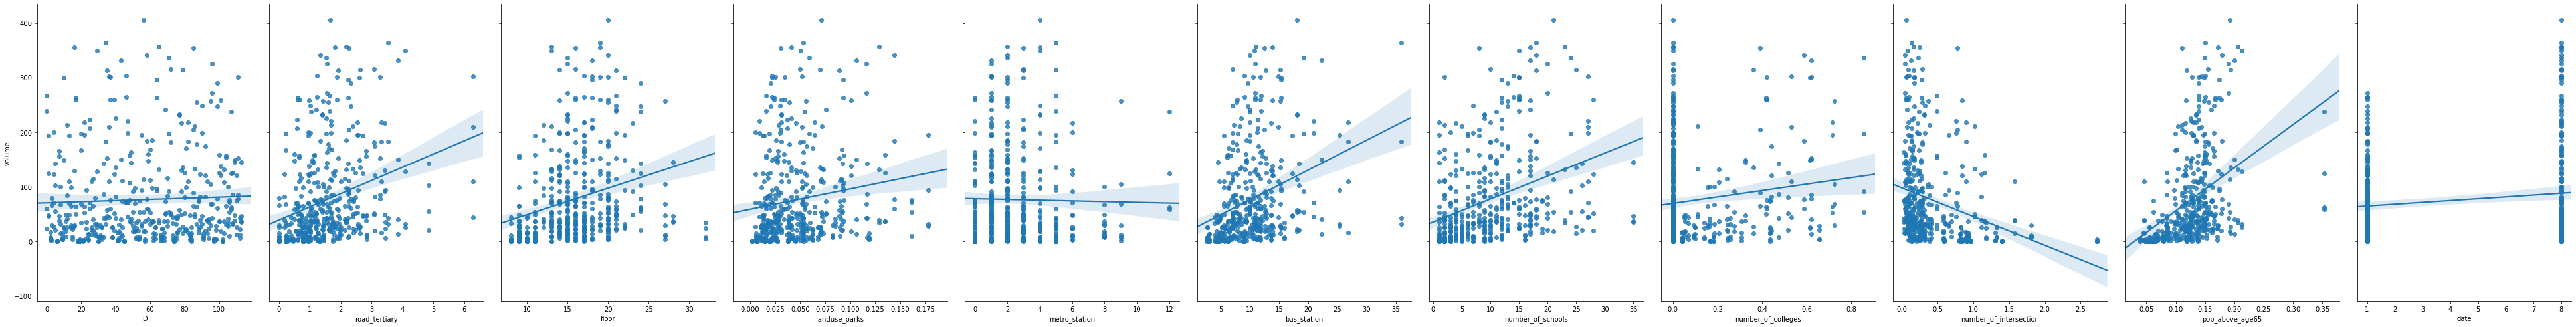

In [11]:
import seaborn as sns

# visualize the relationship between the features and the response using scatterplots
fig = plt.figure()
sns.pairplot(bike_ds, x_vars=['ID','road_tertiary','floor','landuse_parks','metro_station','bus_station',
  'number_of_schools','number_of_colleges','number_of_intersection','pop_above_age65','date'], y_vars='volume', size=7, aspect=0.7, kind='reg')

plt.savefig('relationship between the features.png')

A low p-value indicates that our predictors are statistically meaningful to our model. However, a high p-value shows that our predictors are not meaning to our model. Therefore, it was determined that variables where p-value is greater than 0.06 are excluded from the analysis.

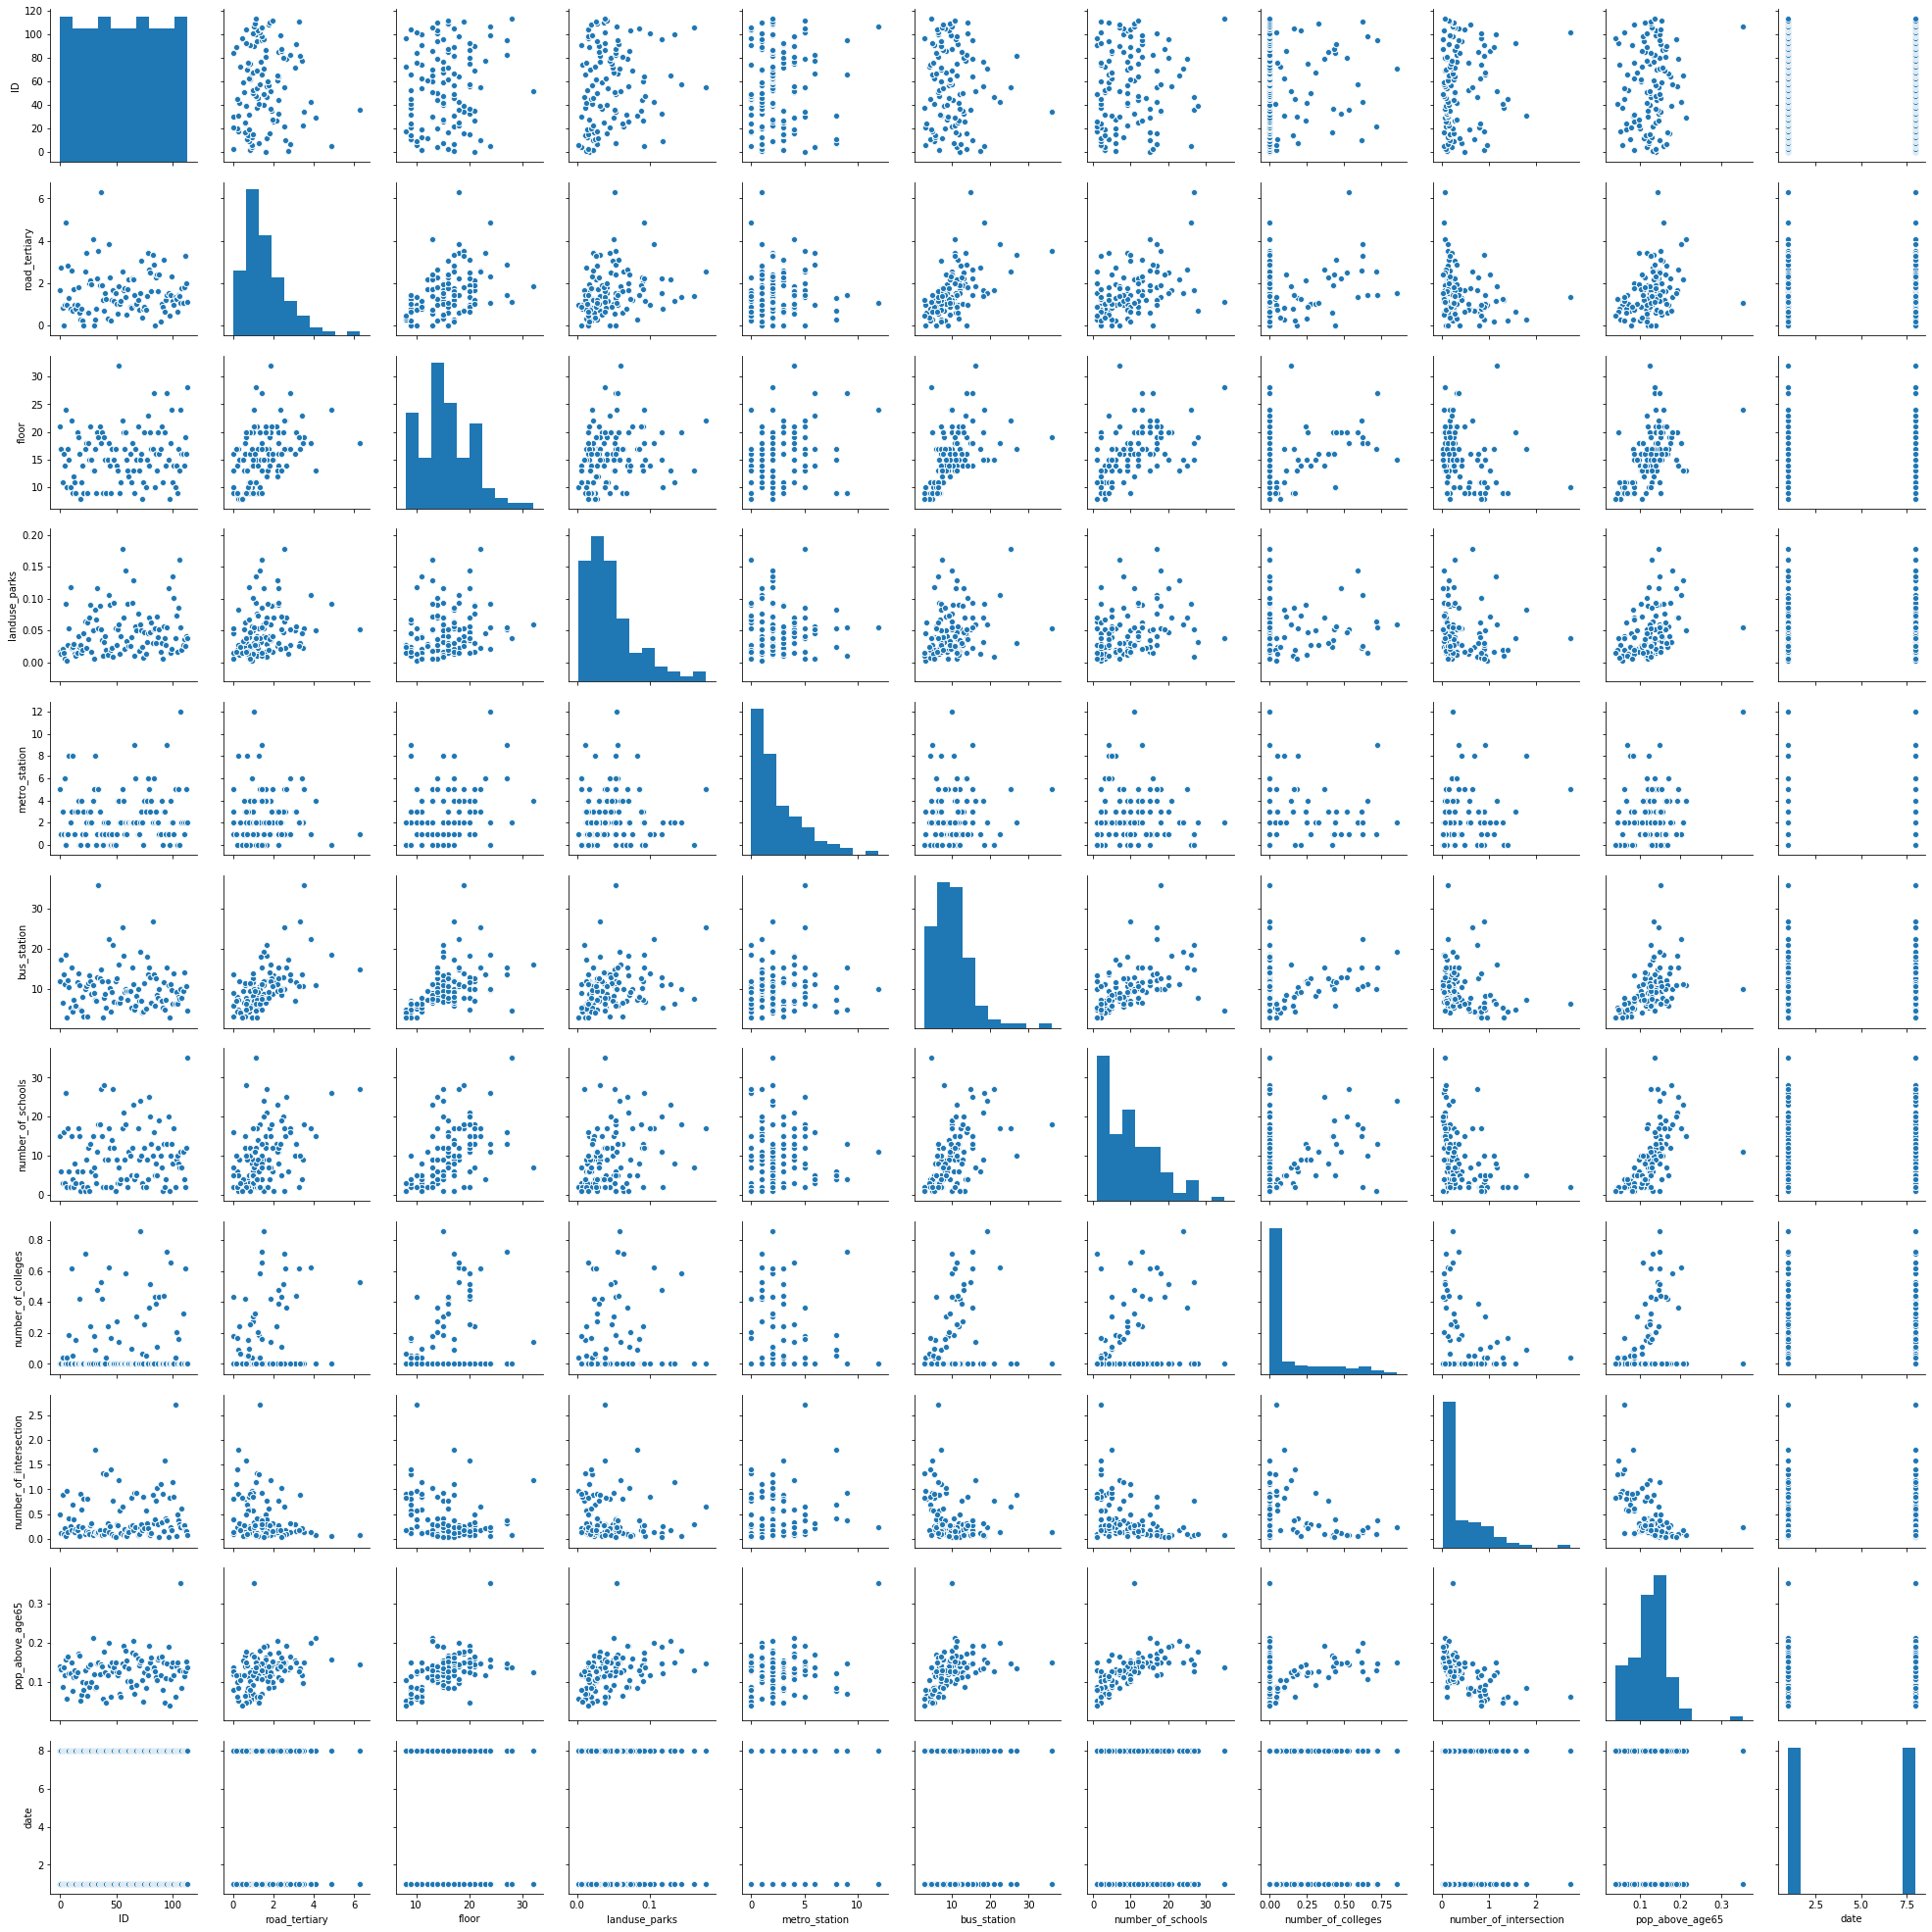

In [12]:
import seaborn as sb
sb.pairplot(X)

plt.savefig('multicollinearity.png')

## Split into training and test dataset

In [13]:
training_set = bike_ds[bike_ds['date'].isin(['1'])]
test_set = bike_ds[bike_ds['date'].isin(['8'])]

# Set a variable of X and y for tranining dataset.
X_train = training_set[['ID','road_tertiary','floor','landuse_parks','metro_station','bus_station',
  'number_of_schools','number_of_colleges','number_of_intersection','pop_above_age65','date']]
y_train = training_set['volume'].values 

# Set a variable of X and y for test dataset.
X_test = test_set[['ID','road_tertiary','floor','landuse_parks','metro_station','bus_station',
  'number_of_schools','number_of_colleges','number_of_intersection','pop_above_age65','date']]
y_test = test_set['volume'].values 

## Build a linear regression model

In [14]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Get the coefficients

In [15]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
ID,0.080517
road_tertiary,5.361192
floor,0.251161
landuse_parks,-161.908563
metro_station,-5.312334
bus_station,2.324604
number_of_schools,0.204785
number_of_colleges,12.311897
number_of_intersection,-0.045939
pop_above_age65,527.592972


## Predict the output

In [16]:
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

In [17]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df = df.head(30)
df

,Actual,Predicted
0,23,64.478042
1,267,64.478042
2,46,97.161535
3,193,97.161535
4,7,24.954233
5,17,24.954233
6,29,79.575191
7,79,79.575191
8,27,39.607470
9,200,39.607470


## Residual Plot

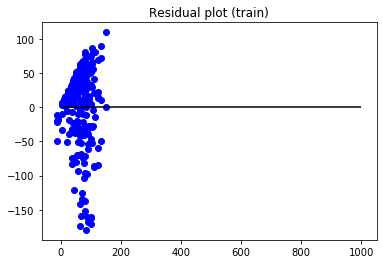

In [18]:
res_plot = plt.scatter(y_pred_train, (y_pred_train - y_train), c='b')
plt.hlines(y=0, xmin= 0, xmax=1000)
plt.title('Residual plot (train)')

plt.savefig('residual plot (train).png')

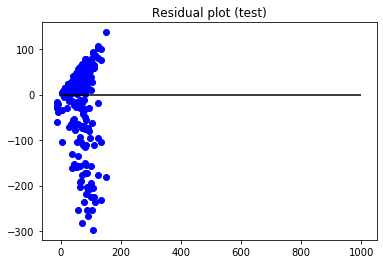

In [19]:
res_plot = plt.scatter(y_pred_test, (y_pred_test - y_test), c='b')
plt.hlines(y=0, xmin= 0, xmax=1000)
plt.title('Residual plot (test)')

plt.savefig('residual plot.png')

## Show the actual vs predicted values in bars

In [1]:
df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Comparing true versus predicted values
plt.scatter(y_test, y_pred_test, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

plt.savefig('Multi Linear, plot of the actual vs predicted value graph.png')

NameError: name 'df' is not defined

## Show the coefficient magnitude

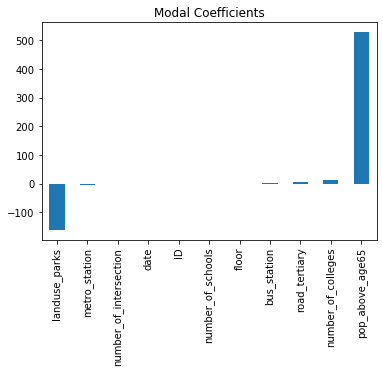

In [21]:
predictors = X_train.columns
coef = pd.Series(regressor.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

plt.savefig('Coefficient magnitude (multi lin_reg).png')

## Obtain metrics

In [22]:
print('Mean Absolute Error:', "%.3f" %metrics.mean_absolute_error(y_test, y_pred_test))  
print('Mean Squared Error:', "%.3f" %metrics.mean_squared_error(y_test, y_pred_test))  
print('Root Mean Squared Error:', "%.3f" %np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

Mean Absolute Error: 66.265
Mean Squared Error: 8781.034
Root Mean Squared Error: 93.707


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
columns = ['Model', 'Train error', 'Test error', 'Sum of Absolute Weights']

values = [ 'LR', np.sqrt(mean_squared_error(y_train, y_pred_train)), 
           np.sqrt(mean_squared_error(y_test, y_pred_test)),
           np.absolute(regressor.coef_[0]).sum() + np.absolute(regressor.intercept_)]

results = pd.DataFrame([values], columns=columns, index=['Linear'])
results

,Model,Train error,Test error,Sum of Absolute Weights
Linear,LR,56.799758,93.707173,24.771745


In [24]:
modelCoef = pd.DataFrame({'Var': ['ID','road_tertiary','floor','landuse_parks','metro_station','bus_station',
  'number_of_schools','number_of_colleges','number_of_intersection','pop_above_age65','date'],
                   'LR': [regressor.coef_[0], regressor.coef_[1], regressor.coef_[2], regressor.coef_[3], 
                          regressor.coef_[4],regressor.coef_[5],regressor.coef_[6],regressor.coef_[7],regressor.coef_[8],regressor.coef_[9],regressor.coef_[10]]})
print(modelCoef)

                       Var          LR
0                       ID    0.080517
1            road_tertiary    5.361192
2                    floor    0.251161
3            landuse_parks -161.908563
4            metro_station   -5.312334
5              bus_station    2.324604
6        number_of_schools    0.204785
7       number_of_colleges   12.311897
8   number_of_intersection   -0.045939
9          pop_above_age65  527.592972
10                    date    0.000000


# Ridge Regression

In [25]:
from sklearn import linear_model

ridge = linear_model.Ridge(alpha=2)
ridge.fit(X_train, y_train)
y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)

values1 = [ 'Ridge', np.sqrt(mean_squared_error(y_train, y_pred_train_ridge)), 
           np.sqrt(mean_squared_error(y_test, y_pred_test_ridge)),
           np.absolute(ridge.coef_[0]).sum() + np.absolute(ridge.intercept_)]

ridge_results = pd.DataFrame([values1], columns=columns, index=['Ridge'])
pd.concat([results, ridge_results])

,Model,Train error,Test error,Sum of Absolute Weights
Linear,LR,56.799758,93.707173,24.771745
Ridge,Ridge,58.284308,95.015374,12.929826


In [26]:
print('Mean Absolute Error:', "%.3f" %metrics.mean_absolute_error(y_test, y_pred_test_ridge))  
print('Mean Squared Error:', "%.3f" %metrics.mean_squared_error(y_test, y_pred_test_ridge))  
print('Root Mean Squared Error:', "%.3f" %np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_ridge)))

Mean Absolute Error: 66.301
Mean Squared Error: 9027.921
Root Mean Squared Error: 95.015


## Coefficient magnitudes (Ridge Regression)

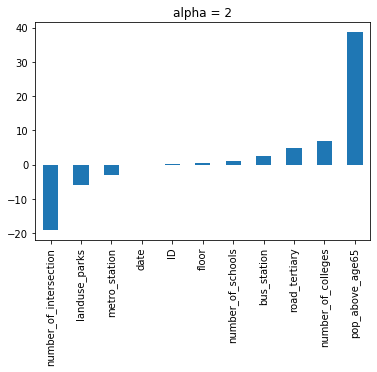

In [27]:
predictors = X_train.columns
coef = pd.Series(ridge.coef_, predictors).sort_values()
coef.plot(kind='bar', title='alpha = 2')

plt.savefig('Coefficient magnitude (Ridge reg).png')

In [28]:
modelCoef['Ridge'] = ridge.coef_
print(modelCoef)

                       Var          LR      Ridge
0                       ID    0.080517   0.146747
1            road_tertiary    5.361192   4.950249
2                    floor    0.251161   0.568848
3            landuse_parks -161.908563  -5.892385
4            metro_station   -5.312334  -2.968743
5              bus_station    2.324604   2.540482
6        number_of_schools    0.204785   1.145442
7       number_of_colleges   12.311897   6.773076
8   number_of_intersection   -0.045939 -19.069857
9          pop_above_age65  527.592972  38.600730
10                    date    0.000000   0.000000


# Lasso Regression

In [29]:
from sklearn import linear_model

lasso = linear_model.Lasso(alpha=2, max_iter = 100000)
lasso.fit(X_train, y_train)
y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)

values2 = [ 'Lasso', np.sqrt(mean_squared_error(y_train, y_pred_train_lasso)), 
           np.sqrt(mean_squared_error(y_test, y_pred_test_lasso)),
           np.absolute(lasso.coef_[0]).sum() + np.absolute(lasso.intercept_)]

lasso_results = pd.DataFrame([values2], columns=columns, index=['Lasso'])
pd.concat([results, ridge_results, lasso_results])

,Model,Train error,Test error,Sum of Absolute Weights
Linear,LR,56.799758,93.707173,24.771745
Ridge,Ridge,58.284308,95.015374,12.929826
Lasso,Lasso,58.768039,95.540210,9.669678


In [30]:
print('Mean Absolute Error:', "%.3f" %metrics.mean_absolute_error(y_test, y_pred_test_lasso))  
print('Mean Squared Error:', "%.3f" %metrics.mean_squared_error(y_test, y_pred_test_lasso))  
print('Root Mean Squared Error:', "%.3f" %np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_lasso)))

Mean Absolute Error: 66.565
Mean Squared Error: 9127.932
Root Mean Squared Error: 95.540


## Coefficient magnitudes (Lasso Regression)

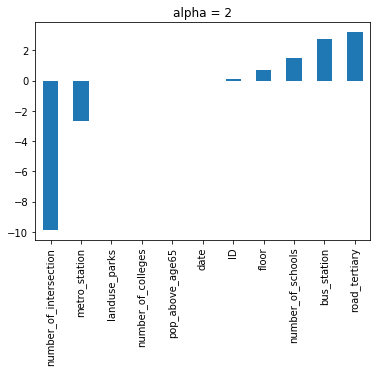

In [31]:
predictors = X_train.columns
coef = pd.Series(lasso.coef_, predictors).sort_values()
coef.plot(kind='bar', title ='alpha = 2')

plt.savefig('Coefficient magnitude (Lasso reg).png')

In [32]:
modelCoef['Lasso'] = lasso.coef_
print(modelCoef)

                       Var          LR      Ridge     Lasso
0                       ID    0.080517   0.146747  0.132841
1            road_tertiary    5.361192   4.950249  3.191877
2                    floor    0.251161   0.568848  0.708983
3            landuse_parks -161.908563  -5.892385 -0.000000
4            metro_station   -5.312334  -2.968743 -2.677586
5              bus_station    2.324604   2.540482  2.741620
6        number_of_schools    0.204785   1.145442  1.494219
7       number_of_colleges   12.311897   6.773076  0.000000
8   number_of_intersection   -0.045939 -19.069857 -9.882657
9          pop_above_age65  527.592972  38.600730  0.000000
10                    date    0.000000   0.000000  0.000000


# Decision Tree Regression

## Training the Decision Tree Regression model on the whole dataset

In [33]:
from sklearn.tree import DecisionTreeRegressor
DecisionTree = DecisionTreeRegressor()
DecisionTree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [34]:
y_pred_test_Decision = DecisionTree.predict(X_test)
y_pred_train_Decision = y_pred = DecisionTree.predict(X_train)

In [35]:
print('Mean Absolute Error:', "%.3f" %metrics.mean_absolute_error(y_test, y_pred_test_Decision))  
print('Mean Squared Error:', "%.3f" %metrics.mean_squared_error(y_test, y_pred_test_Decision))  
print('Root Mean Squared Error:', "%.3f" %np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_Decision)))

Mean Absolute Error: 59.851
Mean Squared Error: 7546.689
Root Mean Squared Error: 86.872


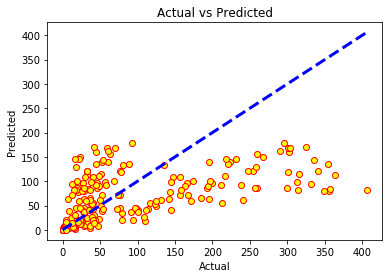

In [36]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_test_Decision, color='yellow', edgecolors='red')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--', lw=3)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

In [37]:
from sklearn import linear_model

values4 = [ 'DecisionTree', np.sqrt(mean_squared_error(y_train, y_pred_train_Decision)), 
           np.sqrt(mean_squared_error(y_test, y_pred_test_Decision)),
           'N/A (could not calculate)']

DecisionTree_results = pd.DataFrame([values4], columns=columns, index=['DecisionTree'])
pd.concat([results, ridge_results, lasso_results, DecisionTree_results])

,Model,Train error,Test error,Sum of Absolute Weights
Linear,LR,56.799758,93.707173,24.7717
Ridge,Ridge,58.284308,95.015374,12.9298
Lasso,Lasso,58.768039,95.540210,9.66968
DecisionTree,DecisionTree,42.097370,86.871679,N/A (could not calculate)


# Bayesian Regression

In [38]:
from sklearn import linear_model

Bayesian = linear_model.LassoCV(cv=5)
Bayesian.fit(X_train, y_train)
y_pred_train_Bayesian = Bayesian.predict(X_train)
y_pred_test_Bayesian = Bayesian.predict(X_test)

values4 = [ 'Bayesian', np.sqrt(mean_squared_error(y_train, y_pred_train_Bayesian)), 
           np.sqrt(mean_squared_error(y_test, y_pred_test_Bayesian)),
           np.absolute(Bayesian.coef_[0]).sum() + np.absolute(Bayesian.intercept_)]
print("Selected alpha = %.2f" % Bayesian.alpha_)

Bayesian_results = pd.DataFrame([values4], columns=columns, index=['Bayesian'])
pd.concat([results, ridge_results, lasso_results, DecisionTree_results, Bayesian_results])

Selected alpha = 0.17


,Model,Train error,Test error,Sum of Absolute Weights
Linear,LR,56.799758,93.707173,24.7717
Ridge,Ridge,58.284308,95.015374,12.9298
Lasso,Lasso,58.768039,95.540210,9.66968
DecisionTree,DecisionTree,42.097370,86.871679,N/A (could not calculate)
Bayesian,Bayesian,57.351931,94.116747,5.85168


In [39]:
print('Mean Absolute Error:', "%.3f" %metrics.mean_absolute_error(y_test, y_pred_test_Bayesian))  
print('Mean Squared Error:', "%.3f" %metrics.mean_squared_error(y_test, y_pred_test_Bayesian))  
print('Root Mean Squared Error:', "%.3f" %np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_Bayesian)))

Mean Absolute Error: 66.014
Mean Squared Error: 8857.962
Root Mean Squared Error: 94.117


## Hyperparameter Selection via Cross-Validation

In [40]:
from sklearn import linear_model

ridge = linear_model.RidgeCV(cv=5,alphas=[0.1, 0.4, 0.6, 0.8, 0.9, 2.0])
ridge.fit(X_train, y_train)
y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)

values3 = [ 'Ridge', np.sqrt(mean_squared_error(y_train, y_pred_train_ridge)), 
           np.sqrt(mean_squared_error(y_test, y_pred_test_ridge)),
           np.absolute(ridge.coef_[0]).sum() + np.absolute(ridge.intercept_)]
print("Selected alpha = %.2f" % ridge.alpha_)

ridge_results = pd.DataFrame([values3], columns=columns, index=['RidgeCV'])
pd.concat([results, ridge_results])

Selected alpha = 0.10


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


,Model,Train error,Test error,Sum of Absolute Weights
Linear,LR,56.799758,93.707173,24.771745
RidgeCV,Ridge,57.081502,94.020112,8.638155


In [41]:
from sklearn import linear_model

lasso = linear_model.LassoCV(cv=5, max_iter = 100000, alphas=[0.1, 0.4, 0.6, 0.8, 0.9, 2.0, 5])
lasso.fit(X_train, y_train)
y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)

values4 = [ 'LassoCV', np.sqrt(mean_squared_error(y_train, y_pred_train_lasso)), 
           np.sqrt(mean_squared_error(y_test, y_pred_test_lasso)),
           np.absolute(lasso.coef_[0]).sum() + np.absolute(lasso.intercept_)]
print("Selected alpha = %.2f" % lasso.alpha_)

lasso_results = pd.DataFrame([values4], columns=columns, index=['Lasso'])
pd.concat([results, ridge_results, lasso_results])

Selected alpha = 0.10


,Model,Train error,Test error,Sum of Absolute Weights
Linear,LR,56.799758,93.707173,24.771745
RidgeCV,Ridge,57.081502,94.020112,8.638155
Lasso,LassoCV,57.061253,93.853558,13.308995
